In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('Data/nfl_final.csv')

In [15]:
df['Pos'].unique()

array(['OLB', 'RB', 'OT', 'TE', 'CB', 'K', 'P', 'S', 'OG', 'ILB', 'DE',
       'DT', 'QB', 'WR', 'C', 'FB', 'LS', 'DL', 'EDGE', 'LB', 'DB', 'OL',
       'G', 'SAF'], dtype=object)

In [10]:
# df['Pos'] = df['Pos'].apply(lambda x: 'RB' if x == 'FB' else 'OL' if x == 'OT' or x == 'OG' or x == 'C' or  x == 'OL' or x == 'G' else 'DL' if x == 'DE' or x == 'DT' or x == 'DL' or x == 'EDGE' else 'LB' if x == 'OLB' or x == 'ILB' or x == 'LB' else 'DB' if x == 'CB' or x == 'S' or x == 'DB' or x == 'SAF' else x)

In [16]:
df['Pos'].unique()

array(['OLB', 'RB', 'OT', 'TE', 'CB', 'K', 'P', 'S', 'OG', 'ILB', 'DE',
       'DT', 'QB', 'WR', 'C', 'FB', 'LS', 'DL', 'EDGE', 'LB', 'DB', 'OL',
       'G', 'SAF'], dtype=object)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

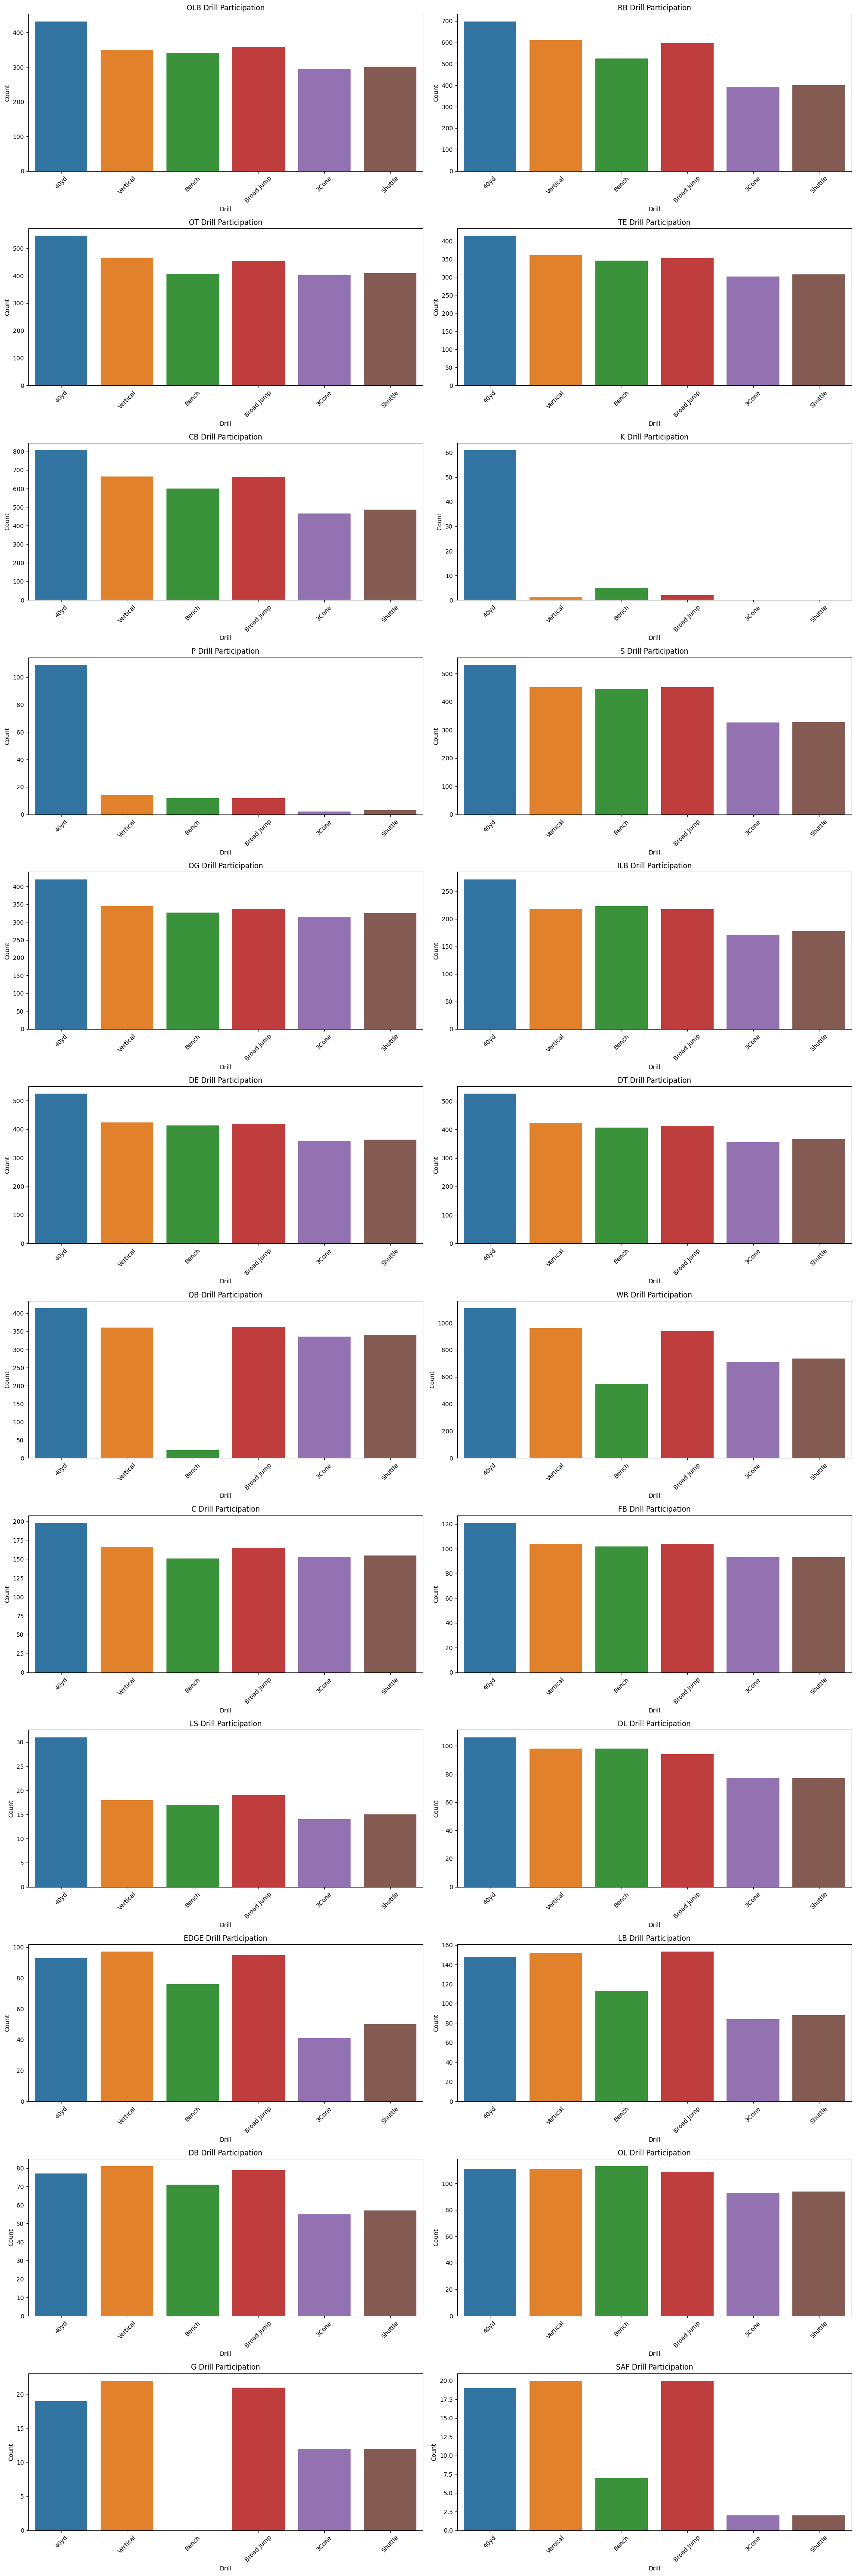

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of drills
drills = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']

# Unique positions in the dataset
positions = df['Pos'].unique()

# Determine the number of rows and columns for the subplots based on the number of positions
n_rows = (len(positions) + 1) // 2  # Adjust the number of rows as needed
n_cols = 2

# Create a large figure to hold all subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), squeeze=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop through each position to create individual plots
for idx, pos in enumerate(positions):
    # Calculate row and column index for the subplot
    row = idx // n_cols
    col = idx % n_cols
    
    # Filter data for the current position
    position_data = df[df['Pos'] == pos]
    
    # Count non-null entries for each drill
    drill_counts = position_data[drills].notna().sum().reset_index()
    drill_counts.columns = ['Drill', 'Count']
    
    # Plot using seaborn's barplot
    ax = sns.barplot(x='Drill', y='Count', data=drill_counts, ax=axes[row, col])
    ax.set_title(f'{pos} Drill Participation')
    ax.set_xlabel('Drill')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for clarity

# Adjust the layout
plt.tight_layout()
plt.show()
